# Simple Linear Regression

We start our section on regression with the simplest model, simple linear regression.

## What we will accomplish in this notebook

In this notebook we will:
- Introduce the simple linear regression model,
- Discuss and visualize its assumptions,
- Demonstrate how to fit the model theoretically and practically and
- Define mean square error (MSE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## The model

In simple linear regression (SLR) we have a variable we would like to predict, $y$, and a single feature $x$. The form of $f$ in the supervised learning framework we have discussed is as follows:

$$
y = f(x) + \epsilon = \beta_0 + \beta_1 x + \epsilon,
$$

where $\beta_0, \beta_1 \in \mathbb{R}$ are constants we must estimate and we assume that $\epsilon \sim N(0,\sigma)$ is an error term independent of $x$.

### Visualizing the model

Let's think about what this model is saying about the outcome variable, $y$. For help we will look at the picture drawn below.

<img src="slr_curves.png" width="60%"></img>

Above we see both the systematic part and the random error. For a given value of $x$ you can find the theoretically possible values for $y$ by going to the line $\beta_0 + \beta_1 x$ and randomly drawing an error term from the normal distribution centered on the line. We can also see one of our key assumptions at play (minus a few artistic deficiencies on my part), no matter what the value of $x$, our errors are drawn from the same exact bell curve.

If our assumptions hold, we can derive some nice features about estimates and predictions made in the course of fitting this model that we may touch on in our problem session and/or the corresponding `Practice Problems` notebook.

### Fitting the model

Given $n$ observations of pairs $(x_i,y_i)$, $i = 1,\dots,n$ how do we fit this model, what do we need to estimate? Remember that our goal is to find an estimate of $f$ called $\hat{f}$. For SLR this means that we need to estimate $\beta_0$ and $\beta_1$, i.e. we need to find $\hat{\beta_0}$ and $\hat{\beta_1}$.

#### Minimizing mean square error (MSE)

We find a $\hat{\beta_0}$ and $\hat{\beta_1}$ by minimizing a <i>loss function</i>, namely the mean square error (MSE), which is given by:

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{f}(x_i))^2.
$$

For the particular case of SLR this is:

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{\beta_0} - \hat{\beta_1} x_i)^2.
$$

The MSE represents the average square error of the estimate from the actual value, for a measurement of the average error that is on the same scale as $y$ you can take the square root of the MSE known as the Root MSE or RMSE.

Doing a little bit of calculus you can find that the values of $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the MSE are:

$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{x}, \text{ and}
$$

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n \left( x_i - \overline{x}\right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left(x_i - \overline{x} \right)^2} = \frac{\text{cov}(x,y)}{\text{var}(x)},
$$

where $\overline{x}$ and $\overline{y}$ are the means of $x$ and $y$ respectively, $\text{cov}$ denotes the covariance and $\text{var}$ denotes the variance.

<i>Note:</i> MSE is used as the default loss function for simple linear regression for a number of reasons stemming from its roots as a statistical regression technique. Importantly, MSE is differentiable with respect to $\hat{\beta}_i$ and is a convex function. However, MSE is not the only loss function people consider in this type of model. Check out the corresponding `Practice Problems` notebook to learn about mean absolute error (MAE).

## Implementing SLR in `sklearn`

While we can code up coefficient estimates for SLR using the formulae we just derived, we can also use `sklearn`'s `LinearRegression` model object. This will be our first model object from scikit-learn, but it will not be our last.

Here is the documentation for `LinearRegression`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>. We will show how to fit the model with some randomly generated data, but in the next notebook we will work with some real data.

In [2]:
## Making some data
np.random.seed(321)
X = np.random.random(100)
y = 2*X + 1 + .5*np.random.randn(100)

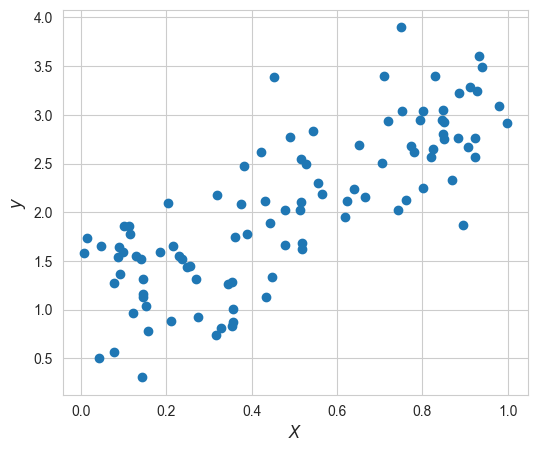

In [3]:
plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

`sklearn` is <b>the</b> python machine learning model package. We will use it frequently throughout these notebooks. `sklearn` models follow a similar pattern we will now demonstrate.

##### Import the model class

In [4]:
## First we import the model class
from sklearn.linear_model import LinearRegression

##### Make a model object

In [5]:
## Now we make an instance of the model
## To do this just call the name of the model class, LinearRegression()
## Sometimes there are optional arguments, here we input copy_X = True
## this ensures that the X array is hard copied prior to fitting
slr = LinearRegression(copy_X = True)

In [6]:
slr

LinearRegression()

##### `fit`ting the model

In [7]:
X.reshape(-1,1).shape

(100, 1)

In [8]:
X

array([0.88594794, 0.07791236, 0.97964616, 0.24767146, 0.75288472,
       0.52667564, 0.90755375, 0.8840703 , 0.08926896, 0.5173446 ,
       0.34362129, 0.21229369, 0.36067344, 0.27077517, 0.76162502,
       0.4780419 , 0.09899468, 0.27539478, 0.79442731, 0.51397031,
       0.45329481, 0.25515125, 0.1139766 , 0.82431305, 0.3177535 ,
       0.15230703, 0.21497959, 0.91211032, 0.04311515, 0.37595241,
       0.31796557, 0.35403302, 0.93335757, 0.3885452 , 0.89593944,
       0.14550322, 0.4903603 , 0.9233404 , 0.8013113 , 0.84837182,
       0.66544598, 0.14321914, 0.11609391, 0.07739594, 0.38291192,
       0.14642985, 0.44785731, 0.35552736, 0.43314193, 0.80080664,
       0.35500568, 0.0477506 , 0.8495784 , 0.62342568, 0.14159893,
       0.99707981, 0.43055091, 0.92260123, 0.23040647, 0.51684848,
       0.74245013, 0.08755963, 0.20380958, 0.5563697 , 0.0069422 ,
       0.35661115, 0.84971676, 0.09130986, 0.1303308 , 0.81932886,
       0.71126234, 0.51564004, 0.32849226, 0.61874605, 0.82843

In [9]:
X.reshape(-1,1)

array([[0.88594794],
       [0.07791236],
       [0.97964616],
       [0.24767146],
       [0.75288472],
       [0.52667564],
       [0.90755375],
       [0.8840703 ],
       [0.08926896],
       [0.5173446 ],
       [0.34362129],
       [0.21229369],
       [0.36067344],
       [0.27077517],
       [0.76162502],
       [0.4780419 ],
       [0.09899468],
       [0.27539478],
       [0.79442731],
       [0.51397031],
       [0.45329481],
       [0.25515125],
       [0.1139766 ],
       [0.82431305],
       [0.3177535 ],
       [0.15230703],
       [0.21497959],
       [0.91211032],
       [0.04311515],
       [0.37595241],
       [0.31796557],
       [0.35403302],
       [0.93335757],
       [0.3885452 ],
       [0.89593944],
       [0.14550322],
       [0.4903603 ],
       [0.9233404 ],
       [0.8013113 ],
       [0.84837182],
       [0.66544598],
       [0.14321914],
       [0.11609391],
       [0.07739594],
       [0.38291192],
       [0.14642985],
       [0.44785731],
       [0.355

In [10]:
## Now we fit the model
## this is typically model.fit(X, y)
## NOTE! X has to be a 2D array, think matrix or column vector
## Thus we must use .reshape(-1,1), see the Python Prep numpy notebook
slr.fit(X.reshape(-1,1), y)

LinearRegression()

##### Making `predict`ions

In [11]:
## model.predict will tell us what the model says
## for an array of input values
slr.predict(X.reshape(-1,1))

array([2.90417501, 1.16518582, 3.10582478, 1.5305277 , 2.61780705,
       2.13097806, 2.9506733 , 2.9001341 , 1.18962659, 2.11089654,
       1.73702322, 1.45439053, 1.77372148, 1.58024966, 2.63661722,
       2.02631244, 1.21055749, 1.5901916 , 2.70721167, 2.10363468,
       1.97305374, 1.54662511, 1.24280039, 2.77152936, 1.68135263,
       1.32529205, 1.46017089, 2.96047958, 1.09029806, 1.80660365,
       1.68180904, 1.75943051, 3.00620621, 1.83370485, 2.92567791,
       1.31064944, 2.0528231 , 2.98464806, 2.72202685, 2.8233067 ,
       2.42962842, 1.30573383, 1.24735708, 1.16407442, 1.82158136,
       1.31264367, 1.9613516 , 1.76264649, 1.92968234, 2.72094075,
       1.76152378, 1.10027411, 2.8259034 , 2.33919572, 1.30224694,
       3.14334408, 1.92410615, 2.98305728, 1.49337138, 2.10982884,
       2.59535056, 1.18594791, 1.43613169, 2.19488324, 1.01244956,
       1.76497895, 2.82620118, 1.19401885, 1.27799657, 2.76080278,
       2.52823072, 2.10722813, 1.70446374, 2.32912459, 2.78041

Those are the basic steps for most every `sklearn` model we will work with. However, models typically have features and methods that are unique to them. We will review a few of those for `LinearRegression` below.

##### Simple linear regression content

In [12]:
## We can look at beta_0_hat with .intercept_
slr.intercept_

0.9975091130141549

In [13]:
## We can look at beta_1_hat with .coef_
slr.coef_

array([2.15211957])

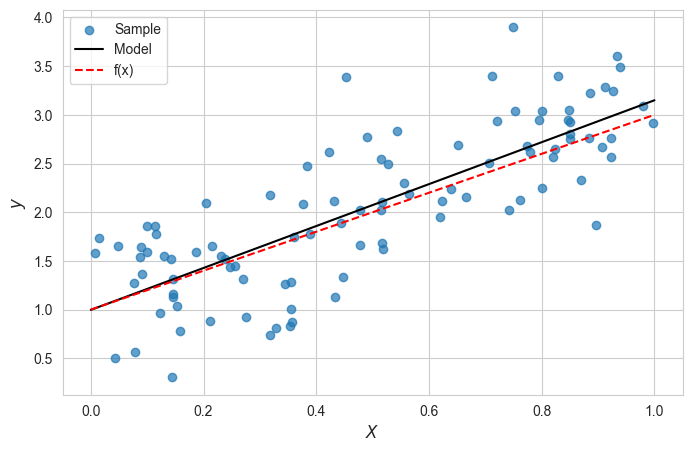

In [14]:
## Plotting the model with our sample

## y = 2*X + 1 + .5*np.random.randn(100)
plt.figure(figsize=(8,5))

plt.scatter(X, 
            y, 
            alpha=.7,
            label="Sample")

plt.plot(np.linspace(0, 1, 100),
         slr.predict(np.linspace(0, 1, 100).reshape(-1,1)),
         'k',
         label='Model')

plt.plot(np.linspace(0,1,100),
         2*np.linspace(0,1,100) + 1,
         'r--',
         label = "f(x)")

plt.legend(fontsize=10)
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

Now you know the basics about simple linear regression and `LinearRegression` in `sklearn`!

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)